In [1]:
# Load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics

In [2]:
# Read data
df = pd.read_csv('gym_data.csv')
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [3]:
df.shape

(62184, 11)

In [4]:
df.columns

Index(['number_people', 'date', 'timestamp', 'day_of_week', 'is_weekend',
       'is_holiday', 'temperature', 'is_start_of_semester',
       'is_during_semester', 'month', 'hour'],
      dtype='object')

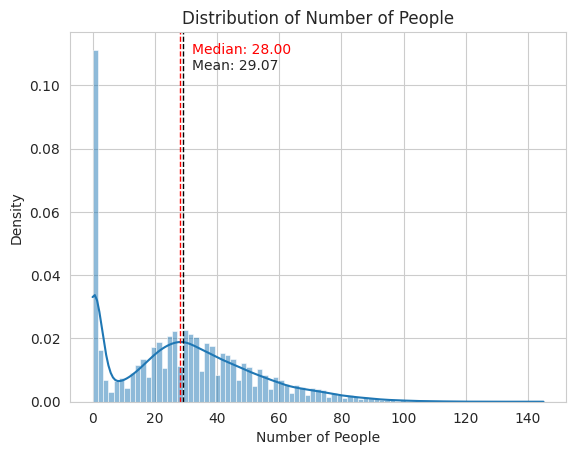

In [5]:
# Plot distribution of number of people - variable of interest
sns.set_style("whitegrid")
sns.histplot(df,x='number_people',kde=True, stat='density').set(title='Distribution of Number of People',
                                                                xlabel = "Number of People")
plt.axvline(df['number_people'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(statistics.median(df['number_people']), color='r', linestyle='dashed', linewidth=1)
plt.text(32, 0.105, 'Mean: {:.2f}'.format(df['number_people'].mean()))
plt.text(32, 0.11, 'Median: {:.2f}'.format(statistics.median(df['number_people'])),color='r')
plt.show()

<Axes: xlabel='number_people'>

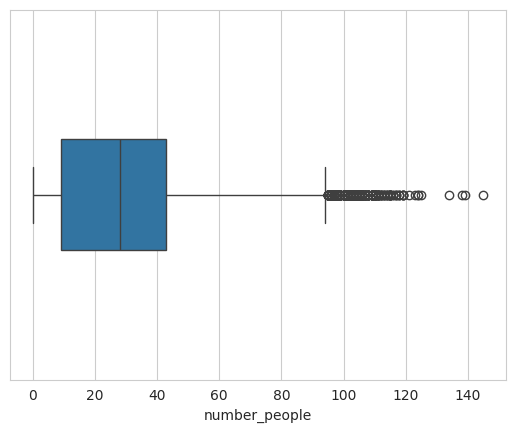

In [6]:
# Boxplot of number of people - another way to visualize distribution
sns.boxplot(df,x='number_people',width=0.3)

[Text(0.5, 1.0, 'Distribution of Number of People'),
 Text(0.5, 0, 'Number of People')]

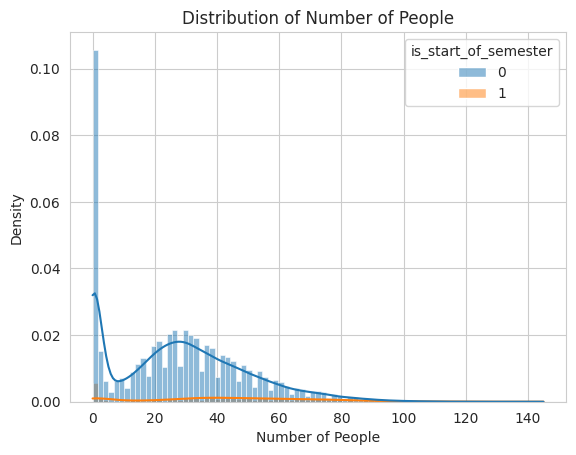

In [7]:
# Plot number of people with 'start of semester'
sns.histplot(df,x='number_people',hue='is_start_of_semester',kde=True, stat='density').set(title="Distribution of Number of People",
                                                                                           xlabel="Number of People")

[Text(0.5, 1.0, 'Distribution of Number of People'),
 Text(0.5, 0, 'Number of People')]

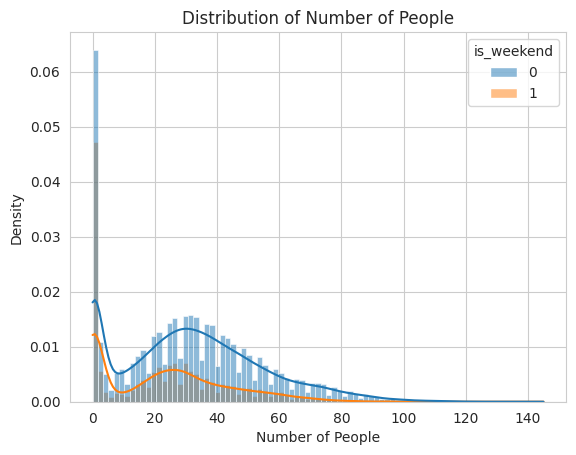

In [8]:
# Plot number of people with 'weekend'
sns.histplot(df,x='number_people',hue='is_weekend',kde=True, stat='density').set(title="Distribution of Number of People",xlabel="Number of People")

In [9]:
# Look at hours where number of people are 0
# Mostly between 1-5am
zeros = df[df['number_people']==0]
zeros.head()
zeros['hour'].value_counts()

3     1325
2     1283
4     1101
5     1091
1     1048
0      729
6      606
23     398
7      334
22     159
21     156
20     111
8       79
19      71
9       67
10      39
18      34
16      26
15      25
17      23
11      21
14      18
12      16
13      15
Name: hour, dtype: int64

<Axes: xlabel='temperature', ylabel='Density'>

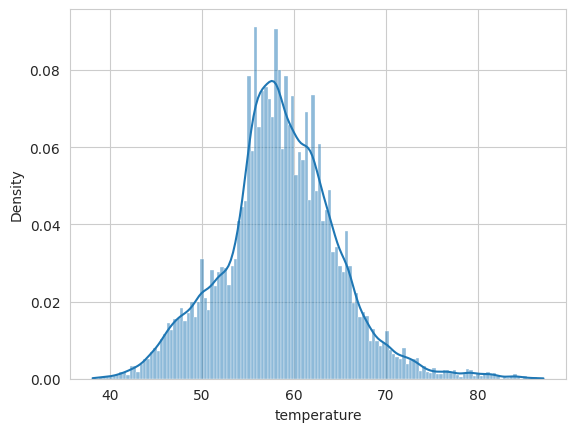

In [10]:
# Distribution of temperature
sns.histplot(df,x='temperature',kde=True, stat='density')

<Axes: xlabel='temperature'>

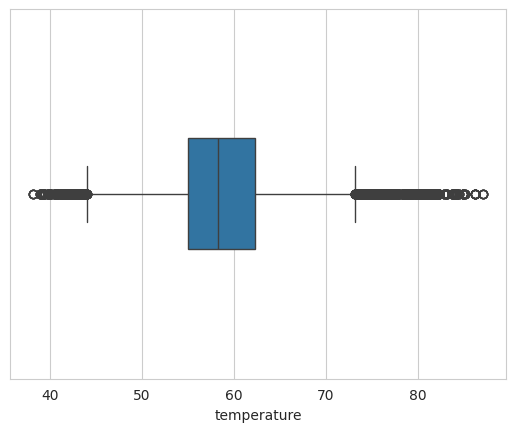

In [11]:
# Box plot of temperature
sns.boxplot(df,x='temperature',width=0.3)

[Text(0.5, 1.0, 'Correlation Matrix')]

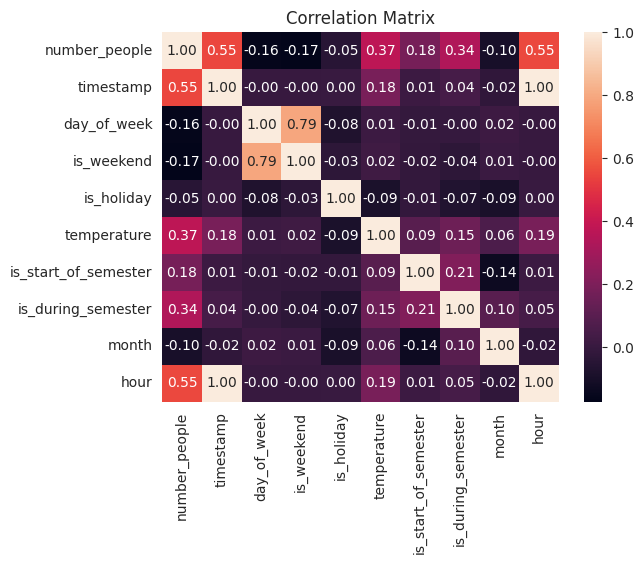

In [12]:
# Get matrix with the numerical variables only
df_cont = df.drop(columns=['date'])

# Correlation matrix
sns.heatmap(df_cont.corr(),annot=True, fmt=".2f").set(title='Correlation Matrix')

Most of the variables have very little linear correlation. However, we are mostly concerned with the correlations between number of people and the other variables. Here, we can see there is a linear correlation coefficient of 0.55 between number of people and timestamp, and 0.37 linear correlation with temperature. Also important to note is that hour comes from timestamp, so we do not want to use both variables in our analysis.

In [13]:
# Scale timestamp
df['timestamp_scaled'] = df['timestamp']/3600

[Text(0.5, 1.0, 'Number of People over Time'),
 Text(0.5, 0, 'Timestamp (hour of day)'),
 Text(0, 0.5, 'Number of People'),
 (0.0, 24.0)]

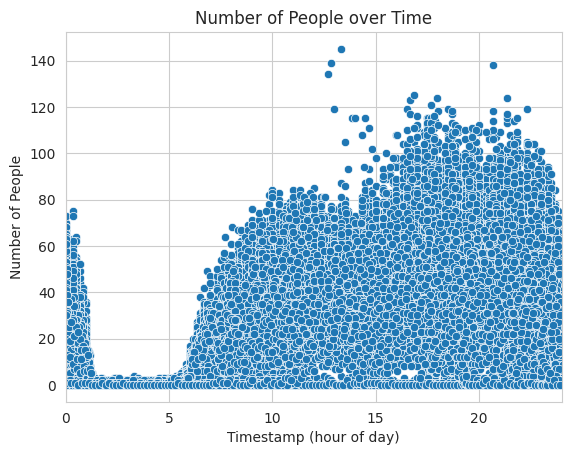

In [14]:
# Plot number of people over time
sns.scatterplot(df, x='timestamp_scaled',y='number_people').set(title="Number of People over Time", xlabel="Timestamp (hour of day)",ylabel="Number of People",xlim=(0,24))

[Text(0.5, 1.0, 'Number of People vs Temperature'),
 Text(0.5, 0, 'Temperature'),
 Text(0, 0.5, 'Number of People')]

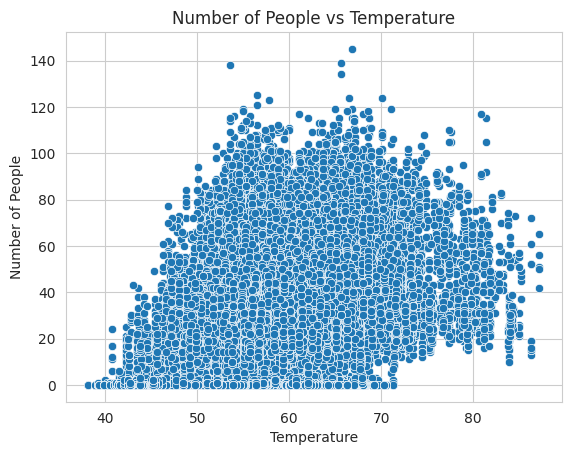

In [15]:
# Plot number of people vs temperature
sns.scatterplot(df, x='temperature',y='number_people').set(title="Number of People vs Temperature",xlabel="Temperature",ylabel='Number of People')

<Axes: xlabel='is_holiday', ylabel='number_people'>

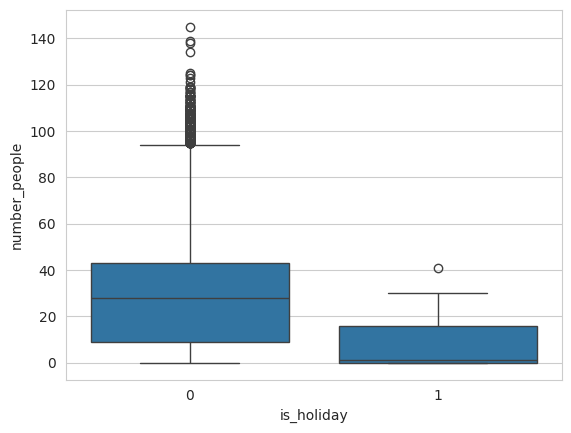

In [16]:
# Plot number of people vs 'is_holiday'
sns.boxplot(df,x='is_holiday',y='number_people')

<Axes: xlabel='is_weekend', ylabel='number_people'>

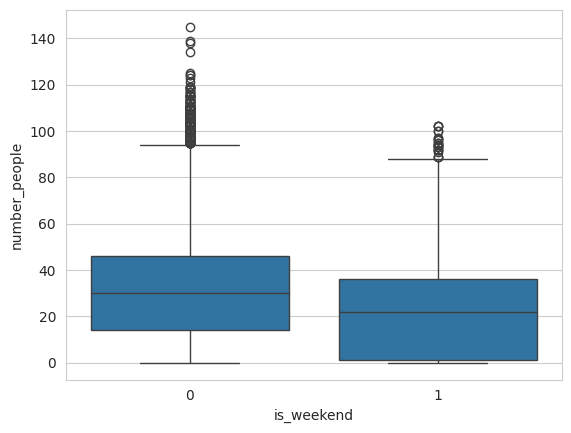

In [17]:
# Plot number of people vs 'is_weekend'
sns.boxplot(df,x='is_weekend',y='number_people')

<Axes: xlabel='day_of_week', ylabel='number_people'>

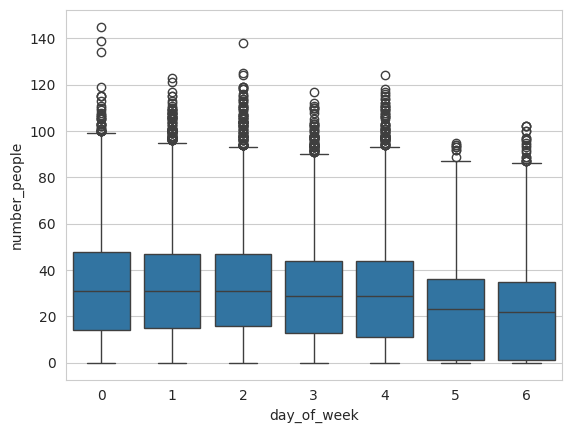

In [18]:
# Plot number of people vs day of the week
sns.boxplot(df,x='day_of_week',y='number_people')

Day of week and is_weekend also contain similar information, we most likely want to use day of week instead as it provides more detail and also we can derive whether it is a weekend or not from this. In general, it seems weekends have lower number of people at the gym, the most crowded days are the first 3 days of the week.

<Axes: xlabel='is_during_semester', ylabel='number_people'>

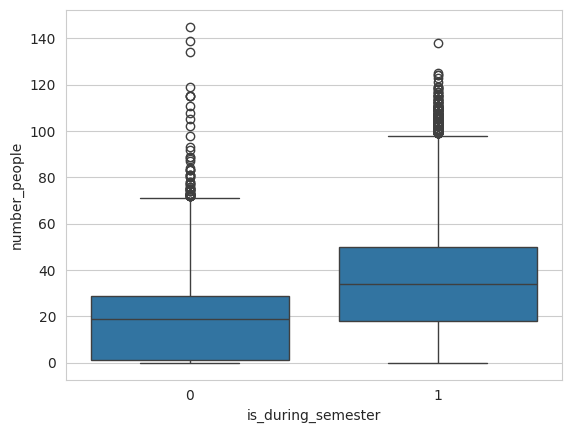

In [19]:
# Plot number of people vs 'is_during_semester'
sns.boxplot(df,x='is_during_semester',y='number_people')

There are fewer people going to the gym during breaks when school is not in session. However, this makes sense since a lot of students don't stay around during summer or winter breaks.

<Axes: xlabel='is_start_of_semester', ylabel='number_people'>

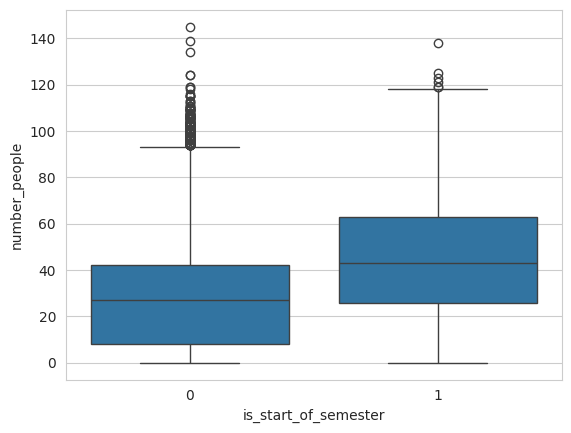

In [20]:
# Plot number of people vs 'is_start_of_semester'
sns.boxplot(df,x='is_start_of_semester',y='number_people')

<Axes: xlabel='hour', ylabel='number_people'>

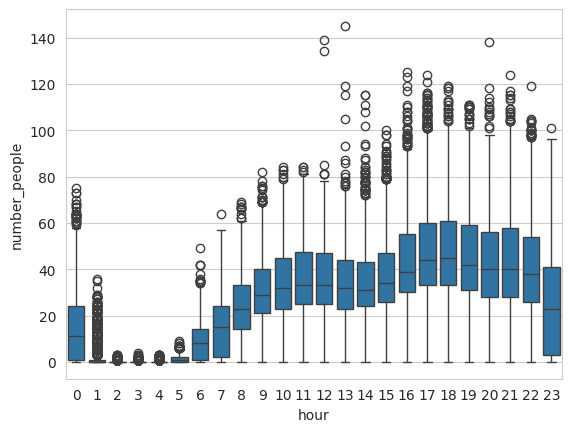

In [21]:
# Plot number of people vs 'hour'
sns.boxplot(df,x='hour',y='number_people')

<Axes: xlabel='month', ylabel='number_people'>

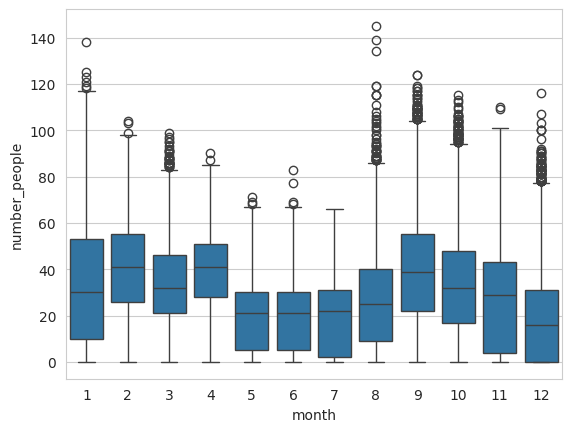

In [22]:
# Plot number of people vs 'month'
sns.boxplot(df,x='month',y='number_people')

As expected, the gym is less crowded in December, and May through July, which is when the semester system usually has its breaks.